## Modelo SERID

+ **S**usceptible
+ **E**xposed
+ **I**nfectious
+ **R**ecovered
+ **D**ead

<img src="SEIRD_Model.png">


$\displaystyle \frac{dS}{dt} = -\frac{\beta S I}{N}$<br><br>
$\displaystyle \frac{dE}{dt} = \frac{\beta S I}{N} - \sigma E$<br><br>
$\displaystyle \frac{dI}{dt} = \sigma E -  \gamma I - \mu I$<br><br>
$\displaystyle \frac{dR}{dt} = \gamma I$<br><br>
$\displaystyle \frac{dD}{dt} = \mu I$<br><br>
$N = S + E + I + R + D$<br><br>

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

In [17]:
def ode_model(z, t, beta, sigma, gamma, mu):
    S, E, I, R, D = z
    N = S + E + I + R + D
    dSdt = -beta*S*I/N
    dEdt = beta*S*I/N - sigma*E
    dIdt = sigma*E - gamma*I - mu*I
    dRdt = gamma*I
    dDdt = mu*I
    return [dSdt, dEdt, dIdt, dRdt, dDdt]
    
def ode_solver(t, initial_conditions, params):
    initE, initI, initR, initN, initD = initial_conditions
    beta, sigma, gamma, mu = params
    initS = initN - (initE + initI + initR + initD)
    res = odeint(ode_model, [initS, initE, initI, initR, initD], t, args=(beta, sigma, gamma, mu))
    return res

In [42]:
initN = 9616621 #População inicial

# initS 
initE = 5
initI = 2
initR = 0
initD = 0

sigma = 1/5.2 # periodo de incubação
gamma = 1/2.9 # taxa de recuperação
mu = 0.034 # taxa de mortalidade
R0 = 2.36 # taxa de transmissibilidade [4]
beta = R0 * gamma # taxa de transmissão
days = 240

In [43]:
initial_conditions = [initE, initI, initR, initN, initD]
params = [beta, sigma, gamma, mu]
# tspan = np.arange(0, days, 1)
tspan = np.linspace(0,240,240)
sol = ode_solver(tspan, initial_conditions, params)
S, E, I, R, D = sol[:, 0], sol[:, 1], sol[:, 2], sol[:, 3], sol[:, 4]

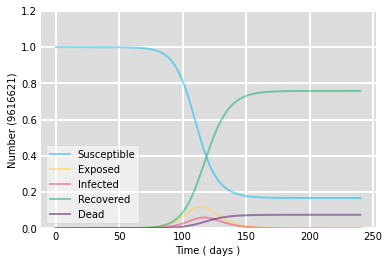

In [44]:
fig = plt.figure(facecolor = 'w')
ax = fig.add_subplot(111, facecolor = '#dddddd', axisbelow = True)

ax.plot(tspan, S/initN, '#00bbf9', alpha = 0.5, lw = 2, label = 'Susceptible')
ax.plot(tspan, E/initN, '#ffd23f', alpha = 0.5, lw = 2, label = 'Exposed')
ax.plot(tspan, I/initN, '#ee4266', alpha = 0.5, lw = 2, label = 'Infected')
ax.plot(tspan, R/initN, '#0ead69', alpha = 0.5, lw = 2, label = 'Recovered')
ax.plot(tspan, D/initN, '#540d6e', alpha = 0.5, lw = 2, label = 'Dead')

ax.set_xlabel('Time ( days )')
ax.set_ylabel(f'Number ({initN})')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length = 0)
ax.xaxis.set_tick_params(length = 0)
ax.grid(b = True, which = 'major', c = 'w', lw = 2, ls = '-')

legend = ax.legend()
legend.get_frame().set_alpha(0.5)

for spine in ('top', 'right', 'bottom', 'left'):
  ax.spines[spine].set_visible(False)
# plt.savefig('sir.pdf')
plt.show()

## Referências Bibliograficas

1. **Pernambuco | Cidades e Estados** | IBGE. Ibge.gov.br. Disponível em: <https://www.ibge.gov.br/cidades-e-estados/pe.html>.
1. **Dois primeiros casos do novo coronavírus são confirmados em PE, diz Secretaria de Saúde.** G1. Disponível em: <https://g1.globo.com/pe/pernambuco/noticia/2020/03/12/primeiros-casos-de-coronavirus-sao-confirmados-pela-secretaria-de-saude-de-pernambuco.ghtml>.
1. **Covid19 por Município** - Brasil.IO. Brasil.io. Disponível em: <https://brasil.io/covid19/PE/>. 
1. ** Observatório Covid-19 BR.** Github.io. Disponível em: <https://covid19br.github.io/estados.html?aba=aba3&uf=PE&q=dia#>.
‌